In [1]:
from scipy import signal
from scipy.signal import kaiserord, lfilter, firwin, freqz

import librosa
import matplotlib.pyplot as plt

import numpy as np
from ipywidgets import  interactive,    Play
from matplotlib.ticker import ( FormatStrFormatter )
from IPython.display import (
    Audio, display )
plt.rcParams['axes.grid'] = True

In [2]:
from frequency_waves import get_wave,nice_wave
import frequency_waves
from Util import fold_and_dft, drop_every_kth, zero_padding, v_to_db ,decimate_in_k

In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


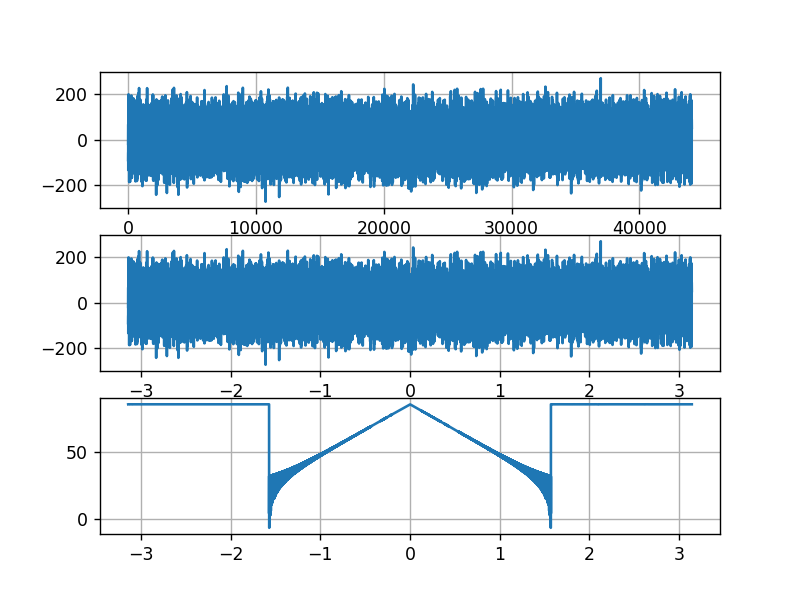

In [4]:
fs = 44100
om = np.linspace(-np.pi,np.pi,fs)
X=get_wave('square',om,np.pi/2,3*np.pi/2)*20
X+=get_wave('triangle',om,0,np.pi/2)*20


#x=get_wave('square_HP')
fig,ax=plt.subplots(3)
ax[0].plot((X))
x=np.real(X)
ax[1].plot(om,x)
ax[2].plot(om,v_to_db(np.fft.fft(x)))


In [5]:
#x, sr = librosa.load('sig_nice.wav',sr=None)
#display(Audio(x, rate=sr, autoplay=True))
n_fft = fs
ax_freq = np.arange(0,2*np.pi,2*np.pi/n_fft)

In [6]:
om_buffer = 0.04
h0 = signal.cheby1(31,0.1, fs*(0.25-om_buffer), 'lowpass', fs=fs,output='sos')
h1 = signal.cheby1(31,0.1, fs*(0.25+om_buffer), 'highpass', fs=fs,output='sos')


In [7]:
r0=signal.sosfilt(h0, x)
r1=signal.sosfilt(h1, x)
x0 = decimate_in_k(2,r0)
x1 = decimate_in_k(2,r1)
g0 = zero_padding(2,x0)
g1 = zero_padding(2,x1)

y0=signal.sosfilt(h0, g0)
y1=signal.sosfilt(h1, g1)

Y=y0+y1

In [8]:

def fft_fold_and_plot(label_arr,sources_arr,ax,title=None):
   
    max_val = -200
    source_fft = []
    for source in sources_arr:
        source_fft.append(fold_and_dft(source,n_fft))
    for i in range(len(source_fft)):
        if max_val < max(v_to_db(source_fft[i])):
            max_val = max(v_to_db(source_fft[i]))
        ax.plot(ax_freq/np.pi,v_to_db(source_fft[i]),alpha=1/(i+1))
    ax.legend(label_arr)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f$\pi$'))
    ax.set_ylim([max_val-60,max_val])

<IPython.core.display.Javascript object>


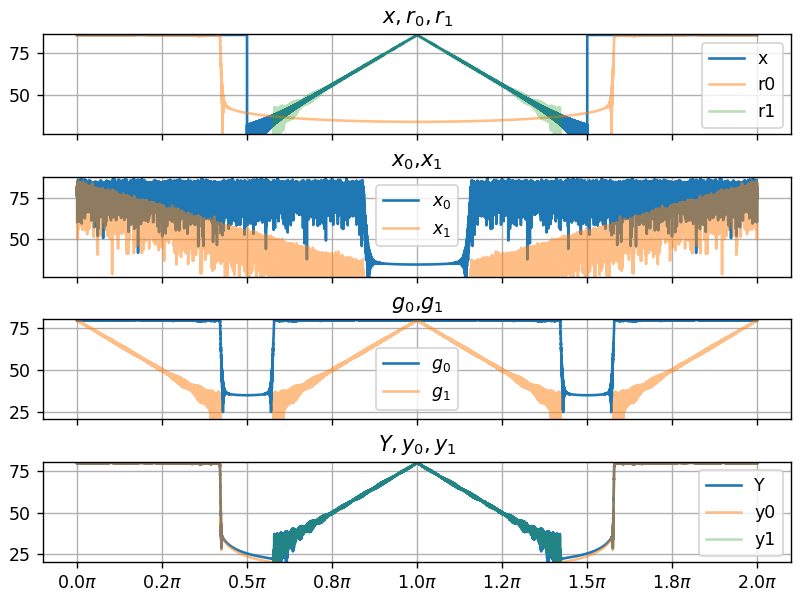

In [9]:

fig,ax=plt.subplots(4,sharex=True)

fft_fold_and_plot(['x','r0','r1'],[x,r0,r1],ax[0],'$x,r_0,r_1$')
fft_fold_and_plot(['$x_0$','$x_1$'],[x0,x1],ax[1],'$x_0$,$x_1$')
fft_fold_and_plot(['$g_0$','$g_1$'],[g0,g1],ax[2],'$g_0$,$g_1$')
fft_fold_and_plot(['Y','y0','y1'],[Y,y0,y1],ax[3],'$Y,y_0,y_1$')
fig.tight_layout(pad=0.5)

In [10]:
def time_plot(x,y,ax,color):
    ax.stem(x,y,use_line_collection=True,markerfmt=color,basefmt=color+'-')

<IPython.core.display.Javascript object>


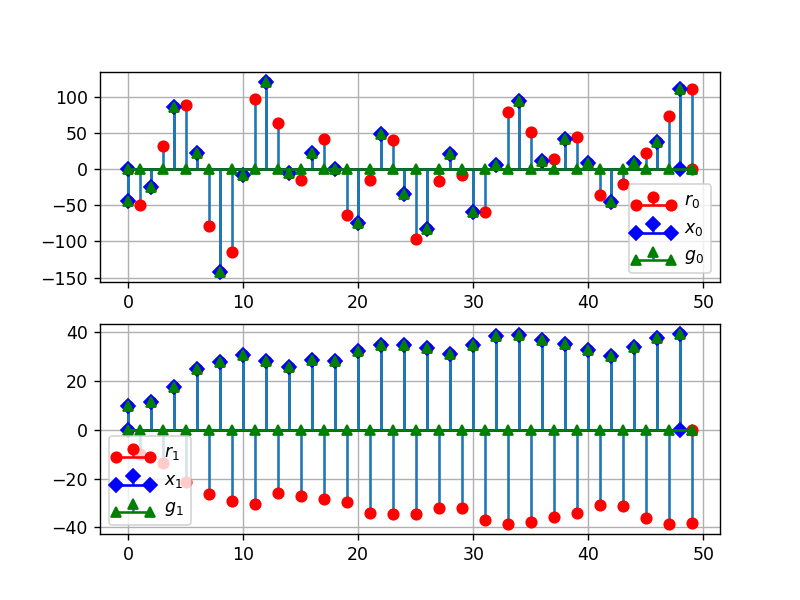

In [11]:
fig,ax=plt.subplots(2)
index = 100
interval = 50

time_plot(range(0,interval),r0[index:index+interval],ax[0],'ro')
time_plot(range(0,interval,2),x0[int(index/2):int((index+interval)/2)],ax[0],'bD')
time_plot(range(0,interval),g0[index:index+interval],ax[0],'g^')
ax[0].legend(['$r_0$','$x_0$','$g_0$'])


time_plot(range(0,interval),r1[index:index+interval],ax[1],'ro')
time_plot(range(0,interval,2),x1[int(index/2):int((index+interval)/2)],ax[1],'bD')
time_plot(range(0,interval),g1[index:index+interval],ax[1],'g^')
ax[1].legend(['$r_1$','$x_1$','$g_1$'])

# summary

<IPython.core.display.Javascript object>


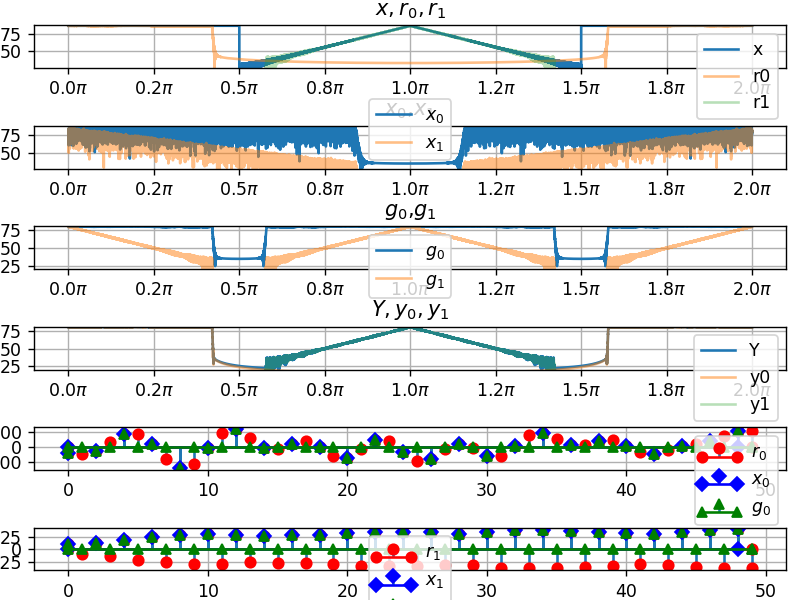

In [19]:
fs = 44100
om = np.linspace(-np.pi,np.pi,fs)
X=get_wave('square',om,np.pi/2,3*np.pi/2)*20
X+=get_wave('triangle',om,0,np.pi/2)*20
n_fft = fs
ax_freq = np.arange(0,2*np.pi,2*np.pi/n_fft)



om_buffer = 0.04
h0 = signal.cheby1(31,0.1, sr*(0.25-om_buffer), 'lowpass', fs=sr,output='sos')
h1 = signal.cheby1(31,0.1, sr*(0.25+om_buffer), 'highpass', fs=sr,output='sos')
r0=signal.sosfilt(h0, x)
r1=signal.sosfilt(h1, x)


x0 = decimate_in_k(2,r0)
x1 = decimate_in_k(2,r1)
g0 = zero_padding(2,x0)
g1 = zero_padding(2,x1)


y0=signal.sosfilt(h0, g0)
y1=signal.sosfilt(h1, g1)

Y=y0+y1

fig, ax = plt.subplots(6)
fft_fold_and_plot(['x','r0','r1'],[x,r0,r1],ax[0],'$x,r_0,r_1$')
fft_fold_and_plot(['$x_0$','$x_1$'],[x0,x1],ax[1],'$x_0$,$x_1$')
fft_fold_and_plot(['$g_0$','$g_1$'],[g0,g1],ax[2],'$g_0$,$g_1$')
fft_fold_and_plot(['Y','y0','y1'],[Y,y0,y1],ax[3],'$Y,y_0,y_1$')
fig.tight_layout(pad=0)

time_plot(range(0,interval),r0[index:index+interval],ax[4],'ro')
time_plot(range(0,interval,2),x0[int(index/2):int((index+interval)/2)],ax[4],'bD')
time_plot(range(0,interval),g0[index:index+interval],ax[4],'g^')
ax[4].legend(['$r_0$','$x_0$','$g_0$'])


time_plot(range(0,interval),r1[index:index+interval],ax[5],'ro')
time_plot(range(0,interval,2),x1[int(index/2):int((index+interval)/2)],ax[5],'bD')
time_plot(range(0,interval),g1[index:index+interval],ax[5],'g^')
ax[5].legend(['$r_1$','$x_1$','$g_1$'])

<IPython.core.display.Javascript object>


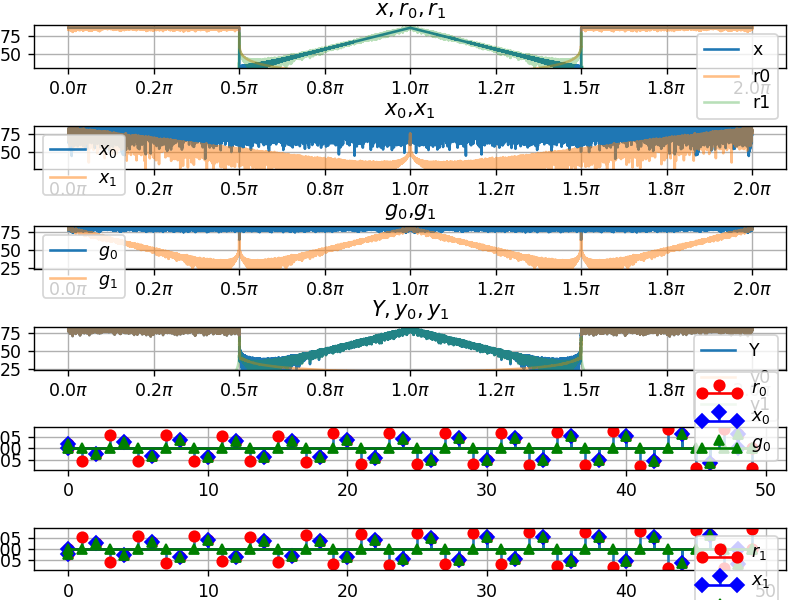

In [14]:


import bqplot.pyplot as bplt
from bqplot import *


y_list = [np.real(x[5000:5050]),np.real(r0[5000:5050]),np.real(x0[2500:2550]),np.real(g0[5000:5050])]

fig = bplt.figure(animation_duration=1000)
display(fig)
lines = bplt.plot(x=range(0,50), y=np.real(x[5000:5050]), colors=['red', 'green'])


def on_value_change(n):
    lines.y =y_list[n]
    #lines.x = x_list[n]


interactive(on_value_change, n=Play(value=0, min=0, max=3, step=1,interval=1500))

Figure(animation_duration=1000, fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(m…

interactive(children=(Play(value=0, description='n', interval=1500, max=3), Output()), _dom_classes=('widget-i…

In [15]:
y_list = [np.real(x[5000:5050]),np.real(r1[5000:5050]),np.real(x1[2500:2550]),np.real(g1[5000:5050])]

fig = bplt.figure(animation_duration=1000)
display(fig)
lines = bplt.plot(x=range(0,50), y=np.real(x[5000:5050]), colors=['red', 'green'])


def on_value_change(n):
    lines.y =y_list[n]
    #lines.x = x_list[n]

    
interactive(on_value_change, n=Play(value=0, min=0, max=3, step=1,interval=2000))

Figure(animation_duration=1000, fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(m…

interactive(children=(Play(value=0, description='n', interval=2000, max=3), Output()), _dom_classes=('widget-i…